In [1]:
library(tidyr)
library(dplyr)
library(reshape2)
library(phyloseq)
library(gridExtra)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘reshape2’ was built under R version 3.6.1”
Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Warning message:
“package ‘phyloseq’ was built under R version 3.6.1”
Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Warning message:
“package ‘ggplot2’ was built under R version 3.6.1”

In [2]:
figDir = '~/Hyphosphere/data/3Exp/figures'

work_dir = '~/Hyphosphere/data/3Exp/DESeq'

# phyloseq - full object without tree (includes archaea)
physeq_file = '~/Hyphosphere/data/3Exp/phyloseq/3Exp_phyloseq_full.rds'

In [3]:
ps = readRDS(physeq_file)

In [6]:
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 61130 taxa and 434 samples ]
sample_data() Sample Data:       [ 434 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 61130 taxa by 8 taxonomic ranks ]

In [4]:
FC = c("ASV1", 
"ASV54" ,
"ASV78", 
"ASV136", 
"ASV3", 
"ASV12",
"ASV2516",
"ASV681", 
"ASV447",
"ASV49", 
"ASV12695", 
"ASV2395", 
"ASV284", 
"ASV1706", 
"ASV1900", 
"ASV26", 
"ASV14332", 
"ASV2962",
"ASV9101",
"ASV2180", 
"ASV8061", 
"ASV4437", 
"ASV6987", 
"ASV2714",
"ASV2160", 
"ASV2117", 
"ASV2704", 
"ASV1002", 
"ASV4083",
"ASV7871", 
"ASV1900", 
"ASV171", 
"ASV2516", 
"ASV8536",
"ASV285", 
"ASV3225", 
"ASV5265", 
"ASV2962", 
"ASV14282")

In [5]:
tmp = ps %>% prune_taxa(FC, .) %>%
tax_table()

In [6]:
head(tmp)

,Kingdom,Phylum,Class,Order,Family,Genus,Seq,
ASV1,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium,TACGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGACTATTAAGTCAGGGGTGAAATCCCGGGGCTCAACCCCGGAACTGCCTTTGATACTGGTAGTCTTGAGTTCGAGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAGGAACACCAGTGGCGAAGGCGGCTCACTGGCTCGATACTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGACTATTAAGTCAGGGGTGAAATCCCGGGGCTCAACCCCGGAACTGCCTTTGATACTGGTAGTCTTGAGTTCGAGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAGGAACACCAGTGGCGAAGGCGGCTCACTGGCTCGATACTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGG
ASV3,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,TACGGAGGGAGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTCAGAGGTGAAAGCCTGGAGCTCAACTCCAGAACTGCCTTTGAGACTGCATCGCTTGAATCCAGGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAAGAACACCAGTGGCGAAGGCGGCTCACTGGACTGGTATTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACGGAGGGAGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTCAGAGGTGAAAGCCTGGAGCTCAACTCCAGAACTGCCTTTGAGACTGCATCGCTTGAATCCAGGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAAGAACACCAGTGGCGAAGGCGGCTCACTGGACTGGTATTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGG
ASV12,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Piscinibacter,TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTTGCAAGACAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTTGTGACTGCATGGCTAGAGTGCGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCGATGGCGAAGGCAATCCCCTGGGCCTGCACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGG,TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTTGCAAGACAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTTGTGACTGCATGGCTAGAGTGCGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCGATGGCGAAGGCAATCCCCTGGGCCTGCACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGG
ASV26,Bacteria,Bacteroidetes,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,TACGGAGGATCCAAGCGTTATCCGGAATCATTGGGTTTAAAGGGTCCGTAGGCGGTTTAGTAAGTCAGTGGTGAAAGCCCATCGCTCAACGGTGGAACGGCCATTGATACTGCTGAACTTGAATTACTGGGAAGTAACTAGAATATGTAGTGTAGCGGTGAAATGCTTAGATATTACATGGAATACCAATTGCGAAGGCAGGTTACTACCAGTTTATTGACGCTGATGGACGAAAGCGTGGGGAGCGAACAGG,TACGGAGGATCCAAGCGTTATCCGGAATCATTGGGTTTAAAGGGTCCGTAGGCGGTTTAGTAAGTCAGTGGTGAAAGCCCATCGCTCAACGGTGGAACGGCCATTGATACTGCTGAACTTGAATTACTGGGAAGTAACTAGAATATGTAGTGTAGCGGTGAAATGCTTAGATATTACATGGAATACCAATTGCGAAGGCAGGTTACTACCAGTTTATTGACGCTGATGGACGAAAGCGTGGGGAGCGAACAGG
ASV49,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Brucella,TACGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGACTTTTAAGTCAGGGGTGAAATCCCGGGGCTCAACCCCGGAACTGCCTTTGATACTGGAAGTCTTGAGTATGGTAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAGGAACACCAGTGGCGAAGGCGGCTCACTGGACCATTACTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGACTTTTAAGTCAGGGGTGAAATCCCGGGGCTCAACCCCGGAACTGCCTTTGATACTGGAAGTCTTGAGTATGGTAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAGGAACACCAGTGGCGAAGGCGGCTCACTGGACCATTACTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGG
ASV54,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium,TATGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGACTATTAAGTCAGGGGTGAAATCCCGGGGCTCAACCCCGGAACTGCCTTTGATACTGGTAGTCTTGAGTTCGAGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAGGAACACCAGTGGCGAAGGCGGCTCACTGGCTCGATACTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,TATGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGACTATTAAGTCAGGGGTGAAATCCCGGGGCTCAACCCCGGAACTGCCTTTGATACTGGTAGTCTTGAGTTCGAGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAGGAACACCAGTGGCGAAGGCGGCTCACTGGCTCGATACTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGG


In [8]:
outfile = file.path(figDir, 'Contaminants.txt')
write.table(tmp, file = outfile, sep = '\t')

In [9]:
ps.m = ps %>% prune_taxa(FC, .) %>% psmelt()

Warning message in psmelt(.):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

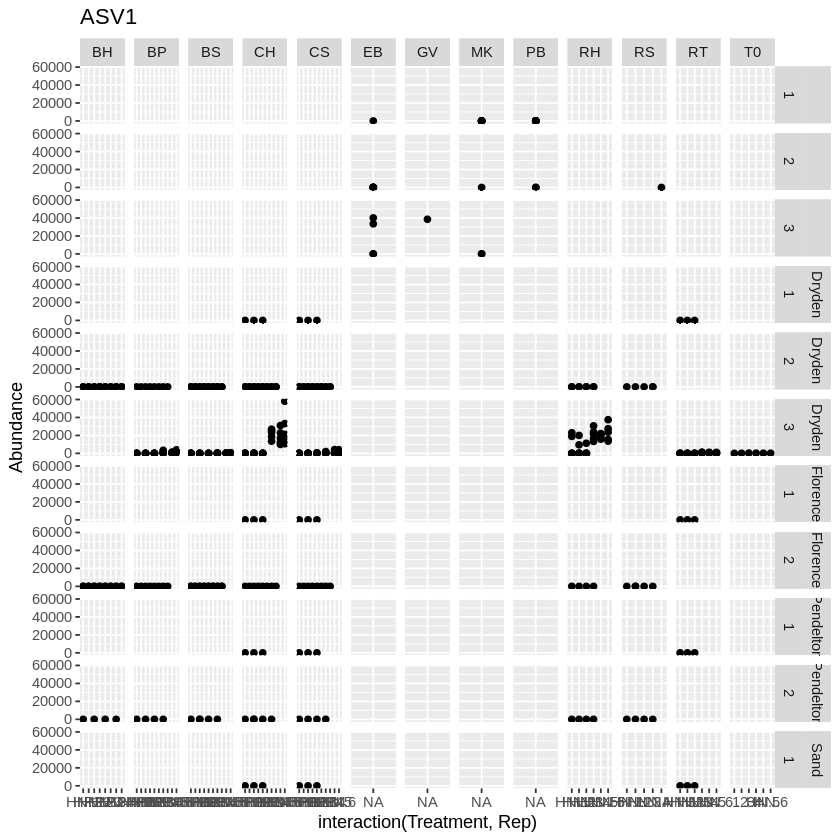

In [15]:
plot = filter(ps.m, OTU == "ASV1") %>%
    ggplot(., aes(x=interaction(Treatment,Rep), y= Abundance)) +
    geom_point()+
    facet_grid(Soil*Experiment~SampleType, scales = 'free_x')+
    ggtitle(as.character("ASV1"))
    
    print(plot)

In [20]:
pdf('~/Hyphosphere/data/ContaminantReCheck.pdf')    

ExpList = c(1,2,3)

for(cTax in FC){
    ps.m.s = filter(ps.m, OTU == cTax)

    for(exp in ExpList){
    
    plot = filter(ps.m.s, Experiment == exp) %>%
    ggplot(., aes(x=interaction(Treatment,Rep), y= Abundance)) +
    geom_point()+
    facet_grid(Soil~SampleType, scales = 'free_x')+
    ggtitle(paste("Exp ",as.character(exp), "-",as.character(cTax), sep = ""))
    
    print(plot)
    
}
}
dev.off()

png 
  2

Warning message in psmelt(.):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

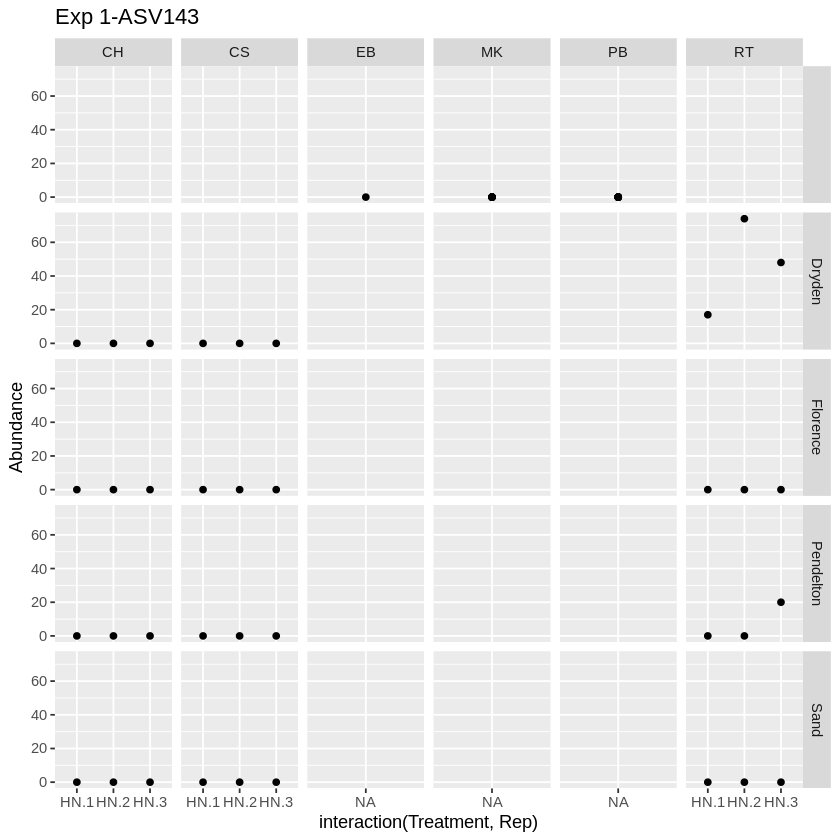

In [30]:
tmp = prune_taxa("ASV12", ps) %>% psmelt()

    
    plot = filter(tmp, Experiment == 1) %>%
    ggplot(., aes(x=interaction(Treatment,Rep), y= Abundance)) +
    geom_point()+
    facet_grid(Soil~SampleType, scales = 'free_x')+
    ggtitle(paste("Exp ",as.character(exp), "-",as.character("ASV143"), sep = ""))
plot

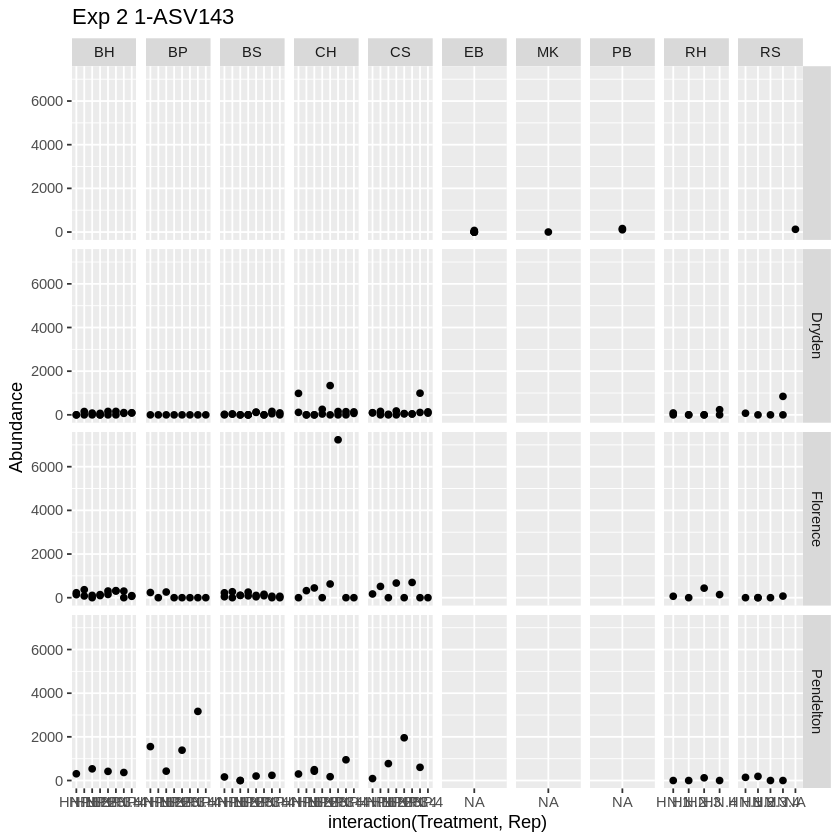

In [27]:
plot = filter(tmp, Experiment == 2) %>%
    ggplot(., aes(x=interaction(Treatment,Rep), y= Abundance)) +
    geom_point()+
    facet_grid(Soil~SampleType, scales = 'free_x')+
    ggtitle(paste("Exp 2 ",as.character(exp), "-",as.character("ASV143"), sep = ""))
plot

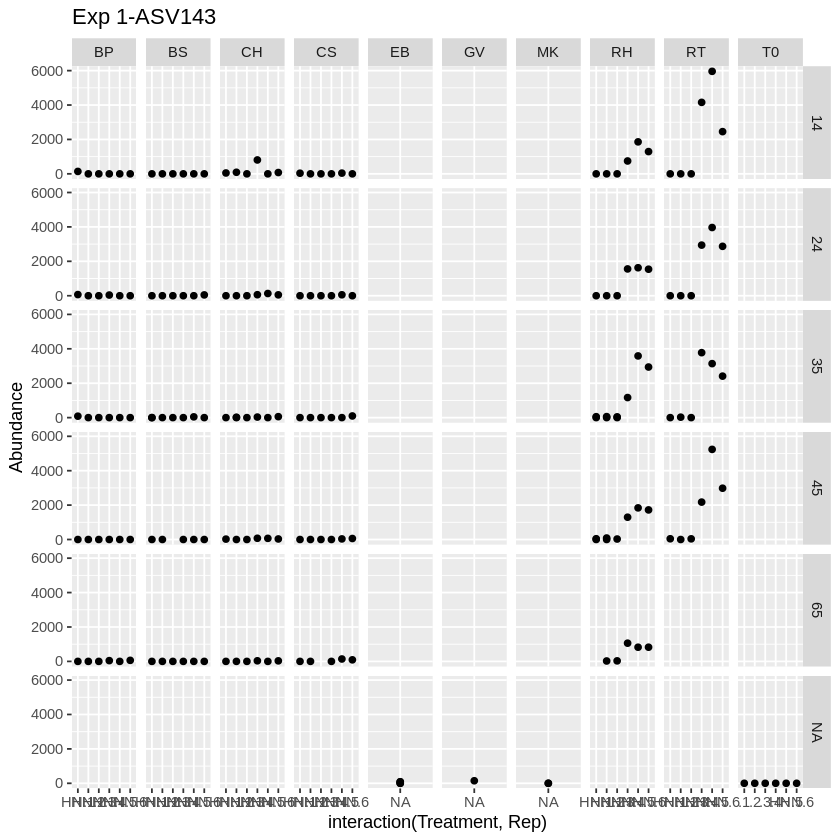

In [31]:
plot = filter(tmp, Experiment == 3) %>%
    ggplot(., aes(x=interaction(Treatment,Rep), y= Abundance)) +
    geom_point()+
    facet_grid(DAI~SampleType, scales = 'free_x')+
    ggtitle(paste("Exp ",as.character(exp), "-",as.character("ASV143"), sep = ""))
plot

In [29]:
head(tmp)

,OTU,Sample,Abundance,sample_Sample,Experiment,Plant,Fungus,Soil,SampleType,Treatment,⋯,Rep,Concentration_ng.ul,Kingdom,Phylum,Class,Order,Family,Genus,Seq,V8
156,ASV39,169_GVFLHP3-CH,7233,GVFLHP3-CH,2,GVFLHP3,Gv,Florence,CH,HP,⋯,3,NA,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Aquabacterium,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTTGCAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCAAGGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCAATGGCGAAGGCAATCCCCTGGGCCTGTACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGG,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTTGCAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCAAGGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCAATGGCGAAGGCAATCCCCTGGGCCTGTACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGG
83,ASV39,135_GVCLHN4-BP,3166,GVCLHN4-BP,2,GVCLHN4,Gv,Pendelton,BP,HN,⋯,4,NA,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Aquabacterium,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTTGCAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCAAGGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCAATGGCGAAGGCAATCCCCTGGGCCTGTACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGG,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTTGCAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCAAGGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCAATGGCGAAGGCAATCCCCTGGGCCTGTACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGG
81,ASV39,134_GVCLHN3-CS,1958,GVCLHN3-CS,2,GVCLHN3,Gv,Pendelton,CS,HN,⋯,3,NA,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Aquabacterium,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTTGCAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCAAGGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCAATGGCGAAGGCAATCCCCTGGGCCTGTACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGG,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTTGCAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCAAGGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCAATGGCGAAGGCAATCCCCTGGGCCTGTACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGG
249,ASV39,37_GVCLHN1-BP,1553,GVCLHN1-BP,2,GVCLHN1,Gv,Pendelton,BP,HN,⋯,1,NA,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Aquabacterium,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTTGCAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCAAGGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCAATGGCGAAGGCAATCCCCTGGGCCTGTACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGG,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTTGCAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCAAGGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCAATGGCGAAGGCAATCCCCTGGGCCTGTACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGG
79,ASV39,133_GVCLHN3-BP,1389,GVCLHN3-BP,2,GVCLHN3,Gv,Pendelton,BP,HN,⋯,3,NA,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Aquabacterium,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTTGCAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCAAGGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCAATGGCGAAGGCAATCCCCTGGGCCTGTACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGG,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTTGCAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCAAGGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCAATGGCGAAGGCAATCCCCTGGGCCTGTACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGG
176,ASV39,178_RIN7HN3-CH,1341,RIN7HN3-CH,2,RIN7HN3,RI,Dryden,CH,HN,⋯,3,NA,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Aquabacterium,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTTGCAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCAAGGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCAATGGCGAAGGCAATCCCCTGGGCCTGTACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGG,TACGTAGGGTG